## Guided Project: Clean and Analyze Employee Exit surveys  

## Introduction

The project data is from DETE (Department of Education, Training and employment) and TAFE (Technical and Further Education) istitute in Queensland, Autrailia. You can find the survey for DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

The aim of the project is to find resigning of the employees below is due to dissatisfaction?
1. The resignation reason for the employees work short period of time.
2. The reason for the long term work employees resignation.
3. The reason for the younger employees resignation.
4. The reason for the older employees resignation.

In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np 

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### 1. Exploring both data sets

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
d_row, d_col = dete_survey.shape
t_row, t_col = tafe_survey.shape
print("dete_survey data set has {} rows and {} columns".format(d_row,d_col))
print("tafe_survey data set has {} rows and {} columns".format(t_row,t_col))

dete_survey data set has 822 rows and 56 columns
tafe_survey data set has 702 rows and 72 columns


In [7]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_null_col = tafe_survey.columns[tafe_survey.isnull().any()]
tafe_survey[tafe_null_col].isnull().sum().sort_values(ascending = False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Other                                                                                                                                      265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [10]:
dete_survey["Interpersonal conflicts"].value_counts()

False    788
True      34
Name: Interpersonal conflicts, dtype: int64

In [11]:
dete_survey["Workplace issue"].value_counts()

A     357
N     160
SA    115
D      77
SD     65
M      14
Name: Workplace issue, dtype: int64

In [12]:
dete_survey["DETE Start Date"]

0            1984
1      Not Stated
2            2011
3            2005
4            1970
5            1994
6            1972
7            1988
8            2009
9            1997
10           1999
11           2009
12           1998
13           1967
14           2007
15           1995
16     Not Stated
17           1996
18           2006
19           1989
20           1982
21           1980
22           1997
23           1973
24           1981
25           1995
26           1974
27           2005
28           1989
29           1975
          ...    
792          1996
793          2003
794    Not Stated
795          1977
796          1970
797          2000
798          1995
799          1981
800          2011
801          1972
802    Not Stated
803          2004
804          2008
805          1990
806          2005
807          2004
808          2010
809          1979
810          1972
811          2008
812          1998
813          1995
814    Not Stated
815          2012
816       

In [13]:
tafe_survey["LengthofServiceCurrent. Length of Service at current workplace (in years)"].value_counts()

Less than 1 year      177
1-2                   113
3-4                    86
11-20                  82
More than 20 years     54
7-10                   44
5-6                    40
Name: LengthofServiceCurrent. Length of Service at current workplace (in years), dtype: int64

* df.info, df.isnull were used to explore the column data
* From the dete_survey data there are columns such as Job dissatisfaction, Dissatisfaction with the department, Workplace issue ect to identify the job satisfation.
* From the tafe_survey data also there are few columns such as Reason for ceasing employment, Contributing Factors. Dissatisfaction ect to identify the job satisfaction measures.

### 2. Dropping the unwanted columns from both data sets

With the exploration done earlier 'DETE start date' column had some rows as not stated. We will read these as NaN values and read the csv file again into pandas.

In [14]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

In [15]:
#drop the columns from 28 to 49
cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(cols, axis = 1)

In [16]:
#drop the columns from 17 to 66
cols2 = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(cols2, axis = 1)

* dete_survey data set inclued some rows with "not_stated" in the "DETE start year" column. The data set was read again to read it as "NaN"
* Columns 28 to 49 was removed from the data set dete_survey as it is unwanted
* Columns 17 to 66 was removed from data set tafe_sutvey as it it unwanted.

### 3. Corrections of the column names in the data set

Finally since we are going to combine the two data sets we will correct both data sets column names.

In [17]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ","_").str.strip()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [18]:
#rename tafe column names similar to the dete datas set
correction ={"Record ID":"id","CESSATION YEAR":"cease_date","Reason for ceasing employment":"separationtype",
            "Gender. What is your Gender?": "gender", "CurrentAge. Current Age": "age","Employment Type. Employment Type":"employment_status","Classification. Classification": "position"
            ,"LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service"
            ,"LengthofServiceCurrent. Length of Service at current workplace (in years):":"role_service"}
tafe_survey_updated.rename(columns =correction, inplace = True)

In [19]:
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')


### 4. Cleaning more unwanted data

In [20]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
pattern = "[rR]esignation"
dete_resig = dete_survey_updated["separationtype"].str.contains(pattern)
dete_resignations = dete_survey_updated[dete_resig].copy()

In [23]:
tafe_bool = tafe_survey_updated["separationtype"] == "Resignation"
tafe_resignations = tafe_survey_updated[tafe_bool].copy()

* From the dete_survey data set "Resignation" under "separationtype" column was filtered using regex for further analysis
* From the tafe_survey data set " Resignation" under "Separation" column was filtred for analysis.

### 5. Cleaning the data

For this step we will explore the date columns in the data sets to see if there is any data that does'nt make sense. 

* cease date is the last year of person's employment
* dete_start_date is person's first year of employment

In [24]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [25]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype(float)

In [26]:
dete_resignations["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [27]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [28]:
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

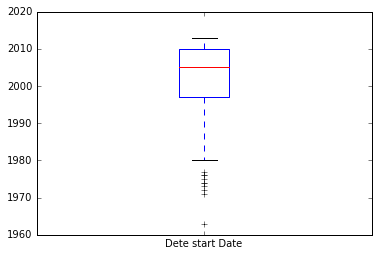

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
dete_resignations["dete_start_date"].plot(kind = "box", label = "Dete start Date")
plt.show()

* In the dete data set, "cease_date was cleaned to only have the year data.
* using value_counts() the data was reviewed.
* Box plot was used to view the "dete_start_date" data since there were dates older than 1980. from the box plot it looks like the data is outlayer. 

### 6. create a new column

In order to answer the question 'reson for resignation of long term employees and reason for resignation of short term employees we need to know the employees service period. 

tafe_resignations column already contains a institute_service column. In order to analyze both surveys together we will create a 'institute_service' column in dete_resignations as well.

In [30]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

* For the data set dete_resignations employees year of service was calculated and a new column was created "institute_service" to match with the tafe data set before combining the data sets

### 7. Identifying the dissatisfied employees

We will identify the employees who resigned because they were unsatisfied.
we will use the columns below to catergorize employees as 'dissatisfied'

 tafe_survey_updated:
 * Contributing Factors. Dissatisfaction
 * Contributing Factors. Job Dissatisfaction


 dete_survey_updated:
 * job_dissatisfaction
 * dissatisfaction_with_the_department
 * physical_work_environment
 * lack_of_recognition
 * lack_of_job_security
 * work_location
 * employment_conditions
 * work_life_balance
 * workload

In [31]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [33]:
dete_resignations["job_dissatisfaction"].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [34]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

#create a new column as dissatisfied and update it with, True, False, Nan    
tafe_resignations["dissatisfied"]=tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(1, skipna= False)

In [35]:
#tafe_resignations["dissatisfied"] =tafe_resignations["Contributing Factors. Job Dissatisfaction"].apply(update_vals)
tafe_resig_up = tafe_resignations.copy()
tafe_resig_up["dissatisfied"].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
#create a new column as dissatisfied and update it with, True, False, Nan 
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis = "columns", skipna = False)
dete_resig_up = dete_resignations.copy()
dete_resig_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

* In dataframe tafe_resignations new column was created as "dissatisfied" and using the df.any() method the column was filled with True, False, Nan according to the feedback.

* A copy of the result df was assigned to tafe_resig_up.

* In dataframe dete_resignations new column was created as "dissatisfied" and using df.any() method the column was filled with True, False or Nan.

* A copy of the result was assigned to dete_resig_up.

### 8. Combining the data

Before combining the data frames "istitute" column will be created to distinguish the two dataframes.


In [37]:
dete_resig_up["institute"]= "DETE"
tafe_resig_up["institute"]= "TAFE"

In [38]:
#combine the 2 dataframes
combined = pd.concat([dete_resig_up,tafe_resig_up])

In [39]:
combined.head(3)

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,relocation,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False


In [40]:
combined.shape

(651, 53)

There is lot of columns still left with Nan values that we wont need for our analysis. We will drop these columns. We will drop any columns that has less than 500 non null values and assign the result to combined_updated.

In [41]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [42]:
combined_updated.head(3)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons


### 9. Clean up the data and analysis

In [43]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data we will convert the numbers into categories for the 'institute service' column. We will use the modified definition as below.

        * New: Less than 3 years at a company
        * Experienced: 3-6 years at a company
        * Established: 7-10 years at a company
        * Veteran: 11 or more years at a company
        
we will assign the result to a new column named 'service_cat'.


In [44]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [45]:
# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [46]:
def cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif (3 <= val < 7):
        return "Experienced"
    elif (7 <= val < 11):
        return "Established"
    else:
        return "Veteran"

In [47]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(cat)
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### 9. Analysis

In [48]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will use df.fillna() method to replace the missing values in the dissatisfied column to value that occurs mostly in this column, that is False.

In [49]:
#replace the missing value with the most frequent occuring value, False
combined_updated["dissatisfied"].fillna(False, inplace = True)
combined_updated["dissatisfied"].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

In [50]:
#pivot_diss = combined_updated_new.pivot_table(index = "service_cat", values = "dissatisfied" )
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_pct

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


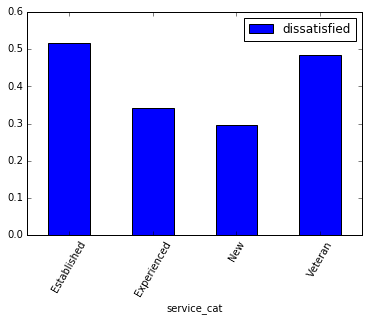

In [51]:
#plot the results
%matplotlib inline
dis_pct.plot(kind ="bar", rot = 60)

From the above plot it is clear that established and veteran resignation is due to dissatisfaction. 

We will do the analysis to check the resignation for the age groups

In [52]:
combined_updated["age"].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [53]:
combined_age = combined_updated[combined_updated["dissatisfied"]== True]

In [54]:
combined_age['age'].value_counts()

51-55            30
41-45            23
26-30            20
46-50            19
36-40            16
31-35            16
56-60            15
46  50           12
61 or older      12
41  45           12
21  25           10
36  40            9
21-25             9
26  30            8
31  35            7
56 or older       6
20 or younger     2
Name: age, dtype: int64

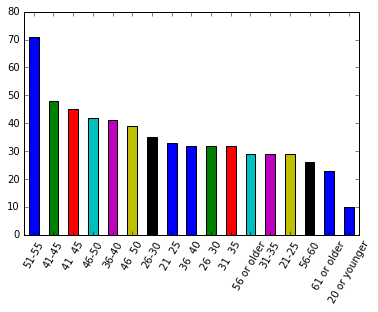

In [55]:
combined_updated["age"].value_counts().plot(kind = 'bar', rot = 60)

### 10. Conclusion

From the above analysis we can conclude the below.

* Employees work for a short period of time doesn't show resignation due to dissatisfaction but employees who are established and veteran show high mean value of resignation due to dissatisfaction. That is emplyees who has worked for 7 years or more in the company.

* The young employees has the lowest count of resignation due to dissatisfaction. The older employees age between 51-55 shows the highest resignation due to dissatisfaction. However the bar chart also shows employees aged 56 and older having other reasons for resignation may be retirement.